In [29]:
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv('/Users/mitttttechka/Desktop/Яндекс МЛ/music_data.csv')
data['listened'] = (pd.to_datetime(data['utc_audition_end_dttm']) - pd.to_datetime(data['utc_audition_start_dttm'])).dt.total_seconds() / data['track_duration']
data = data.drop('Unnamed: 0', axis = 1)

In [31]:
genres = pd.get_dummies(data['track_genre'])
genres['user_id'] = data['user_id']
genres = pd.DataFrame(genres.groupby('user_id').sum().sort_values(by = 'TECHNO'))

In [32]:
genres_perc = pd.DataFrame()
for i in genres.columns:
    name = i + '_PERC'
    genres_perc[name] = genres[i] / genres.sum(axis = 1)
genres = pd.concat([genres, genres_perc], axis = 1)

user_stats = pd.concat([data.groupby('user_id').mean(), genres], axis = 1)[['listened', 'TECHNO_PERC']]

user_stats['listened_techno'] = data[data['track_genre'] == 'TECHNO'][['user_id', 'track_genre', 'listened']].groupby('user_id').mean()

data['sec_listened'] = (pd.to_datetime(data['utc_audition_end_dttm']) - pd.to_datetime(data['utc_audition_start_dttm'])).dt.total_seconds()

user_stats['total_hours'] = data.groupby('user_id').sum()['sec_listened']/3600

In [33]:
def position(x):
    pos = 0
    for i in x:
        if i <= x[20]:
            pos += 1
    return pos

genres['techno_pos'] = genres.iloc[:, 22:44].apply(lambda x: position(x), axis =  1)

user_stats = pd.concat([user_stats, genres['techno_pos']], axis = 1)

user_stats['techno/all'] = user_stats['listened_techno']/user_stats['listened']

In [34]:
users_score = user_stats[['techno/all', 'techno_pos', 'total_hours']]

from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
users_score = pd.DataFrame(normalizer.fit_transform(users_score), columns = users_score.columns)

users_score['score'] = users_score['techno/all'] * (users_score['techno_pos'] ** 2) * (users_score['total_hours'] ** 0.5)

In [36]:
data

,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm,listened,sec_listened
0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28T12:32:10.776000Z,2021-02-28T12:31:01.865000Z,0.204709,68.911
1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19T12:13:43.369000Z,2021-01-19T12:12:48.185000Z,0.128695,55.184
2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27T19:53:57.143000Z,2021-02-27T19:52:42.470000Z,0.161118,74.673
3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24T01:51:44.526000Z,2021-02-24T01:46:25.549000Z,0.985269,318.977
4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24T05:04:32.855000Z,2020-12-24T05:00:09.645000Z,0.830608,263.210
...,...,...,...,...,...,...,...,...,...
842392,45d2ac0d4fe049d387caf17a5243074e,360.581998,POP,7bedf37f-a671-4aa2-bcf9-e2defccbcb8e,e5e46188fe6d41f89faf,2021-02-05T09:17:07.865000Z,2021-02-05T09:11:33.925000Z,0.926114,333.940
842393,a0f30ab974e94b19b9be607f4ac55f76,373.243783,RAP,e06f3160-d57e-47f3-be08-33d3c5de26e8,f437ddab36c74c67a42d,2021-02-20T13:31:47.351000Z,2021-02-20T13:31:02.089000Z,0.121267,45.262
842394,ae2f051bbfa44cbdaf140ef2124e5e82,574.092229,BLUES,08de5d63-286b-40a2-b609-e7d85218f182,6d1fe5c707a7482a82e6,2021-02-26T17:00:06.380000Z,2021-02-26T16:54:46.656000Z,0.556921,319.724
842395,9fda54d3ad6841f0ad78e84c6abdf506,370.237483,POP,0397b6fb-a5fe-4e9c-b50d-ff9cff864bc7,7cb9103d77eb4a899c19,2021-02-25T06:57:20.404000Z,2021-02-25T06:52:09.760000Z,0.839040,310.644


In [37]:
data.describe()

,track_duration,listened,sec_listened
count,842397.000000,842397.000000,842397.000000
mean,651.026261,0.654387,425.734771
std,900.259585,0.336291,696.770853
min,240.635442,0.000014,0.005000
25%,366.486757,0.274943,128.322000
50%,407.273724,0.806099,316.265000
75%,465.304148,0.933136,397.080000
max,4786.285463,1.401005,5854.082000


In [32]:
data[data['listened'] > 1]

,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm,listened
16,41b523da685241ea91db0e279653a8bc,488.283698,TECHNO,a0993e54-88ae-49d6-9684-1f79876b7cc2,e8b5db9db6de4c758303,2021-02-02T01:41:47.014000Z,2021-02-02T01:33:27.298000Z,1.023413
31,9a2ec6d9745d42e4a14942d25e71313e,347.197001,RAP,2f50ad14-179c-44db-826e-fd73b407e538,09b8207e03f54160b94a,2021-01-19T07:33:00.910000Z,2021-01-19T07:27:08.651000Z,1.014580
41,66f1422dd5fb492096c26315f1c28133,376.339266,DISCO,b0d72e38-a1ef-46e1-a5fa-c8e6591c8120,be778137f49f4a84862c,2021-01-17T11:22:15.132000Z,2021-01-17T11:15:50.890000Z,1.020999
42,e0048da294f74e2fa5fd5333a695626f,341.960904,RAP,c690585c-9939-4acb-9842-dd789ee9c5d0,e8179513ff7d41808689,2021-01-23T12:23:35.310000Z,2021-01-23T12:17:43.041000Z,1.030144
55,11c2eb82b9f844d89bb60f1416e6a9cc,4495.932322,PODCASTS,b915718e-443d-4e0e-98d6-23de163df462,bcec45de095c456ea61e,2021-02-24T19:33:39.849000Z,2021-02-24T18:17:46.663000Z,1.012735
...,...,...,...,...,...,...,...,...
842335,9b6c98ea6ad9481980d329090450415f,371.994573,RAP,f8c58f58-43a2-4056-9c81-4a12cd696701,084e21d107e34cf4bc1b,2021-01-02T13:11:27.274000Z,2021-01-02T13:04:19.530000Z,1.149866
842347,4c93ffbb991948728b0f840939c915e3,408.146415,POP,23af8333-067b-4fc3-9dc8-3117d794edcc,bc28feafca6d456fab6d,2021-02-28T00:50:44.615000Z,2021-02-28T00:43:15.262000Z,1.100960
842349,d94a83a840c64bf693ccacd9198e0ce4,398.994731,POP,10e6dc48-ca02-463d-9c08-a430f0047f94,6bc178afe2354b018e92,2020-12-11T18:10:53.880000Z,2020-12-11T18:04:12.409000Z,1.006206
842354,73c76b5cc66444aab1b136e461bf45f4,421.863309,ROCK,bf3963c9-357c-4f38-932b-31f4fdb9f648,c9e040202a9b48b5863a,2021-02-18T08:39:33.267000Z,2021-02-18T08:32:14.908000Z,1.039102


In [38]:
data[(data['track_genre'] == 'TECHNO') & (data['listened'] > 0.6)].groupby('user_id').sum()

,track_duration,listened,sec_listened
user_id,,,
002123faf66b47b5aafa,6049.680635,11.139523,5198.163
0041383820e248e487a6,20547.089305,38.210213,17815.786
008005a451764a63aa3f,11753.672031,22.410425,10550.814
00c017dc34254d39a390,17932.967239,33.726380,15924.036
00f628a2f8044ae18d88,10819.004445,20.445505,9622.406
...,...,...,...
ff77d34a23c04d36a421,9907.154455,17.981126,8486.422
ff9b606118d449f1ab15,7115.790481,13.763829,6533.654
ffa2421c514844c087f3,8436.559883,15.912458,7452.760


In [29]:
genres.sort_values(by = 'techno_perc', ascending = False)

,BLUES,CLASSICAL,DANCE,DISCO,DUBSTEP,ELECTRONICS,HARDROCK,HOUSE,INDUSTRIAL,JAZZ,...,POP,POSTROCK,PUNK,RAP,RELAX,RNB,ROCK,TECHNO,VOCAL,techno_perc
user_id,,,,,,,,,,,,,,,,,,,,,
64b6c65c4129495ba6a7,4,3,12,14,40,19,26,6,5,4,...,63,0,4,40,1,11,55,59,27,0.122917
f8d3066844134fbe8cb7,1,2,4,3,11,11,12,4,3,1,...,28,0,0,11,1,4,18,19,6,0.118750
47a5213087cd4f67a1be,2,0,3,3,4,7,7,4,2,0,...,23,0,1,10,0,6,12,14,5,0.117647
1e27245913cc40d3a27f,1,2,5,7,14,23,19,6,6,1,...,53,2,1,34,4,5,46,40,19,0.116618
08915ae5122e426d91e9,3,1,9,11,15,21,22,7,4,5,...,63,1,1,33,4,2,23,38,21,0.113095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8eb5ee0225a74f8e8073,0,2,3,4,5,11,13,4,6,3,...,33,0,0,18,3,6,22,7,8,0.038043
30bfa0fadeec4470aa4c,1,1,3,10,13,10,17,3,7,1,...,50,0,2,25,2,6,30,9,10,0.035857
11ba8613d307450d99d9,1,1,4,7,15,3,12,4,0,0,...,26,0,2,6,1,1,21,5,8,0.035461


In [24]:
user_stats[user_stats['listened_techno'] > user_stats['listened']]

,listened,techno_perc,listened_techno
00c017dc34254d39a390,0.677102,0.080569,0.717884
00f628a2f8044ae18d88,0.659865,0.084337,0.680341
01936de0105345d38eb4,0.660726,0.077698,0.663106
01cc4049e5b14fbe946b,0.660505,0.068071,0.668052
0281c2d5ce1c4b9aaada,0.633919,0.080831,0.760160
...,...,...,...
fd7a520bcda845caa558,0.682492,0.071776,0.709767
fdd35237fd6e4c3ab8a7,0.652514,0.061747,0.660690
ff122fc8c3354f059efa,0.659223,0.075540,0.730062
ff457d71e1c9414e92b5,0.665184,0.064286,0.706218


In [39]:
genres.describe()

,BLUES,CLASSICAL,DANCE,DISCO,DUBSTEP,ELECTRONICS,HARDROCK,HOUSE,INDUSTRIAL,JAZZ,...,POP_PERC,POSTROCK_PERC,PUNK_PERC,RAP_PERC,RELAX_PERC,RNB_PERC,ROCK_PERC,TECHNO_PERC,VOCAL_PERC,techno_pos
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,...,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,3.272727,2.588303,8.935727,11.306312,27.632889,23.749276,31.463810,10.700058,9.111175,3.638101,...,0.177864,0.001045,0.009699,0.091475,0.008986,0.024288,0.116546,0.070741,0.050107,17.793283
std,2.013648,1.797430,3.843390,4.671166,9.741956,8.401582,10.698044,4.529588,4.105549,2.227607,...,0.017722,0.001566,0.004722,0.013649,0.004375,0.007504,0.015407,0.012489,0.010033,1.812983
min,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.104683,0.000000,0.000000,0.041825,0.000000,0.000000,0.052174,0.032746,0.015504,11.000000
25%,2.000000,1.000000,6.000000,8.000000,21.000000,18.000000,24.000000,7.000000,6.000000,2.000000,...,0.166209,0.000000,0.006459,0.082405,0.006065,0.019521,0.106904,0.062500,0.043356,17.000000
50%,3.000000,2.000000,9.000000,11.000000,27.000000,23.000000,31.000000,10.000000,9.000000,3.000000,...,0.177102,0.000000,0.009434,0.091205,0.008636,0.023913,0.116279,0.070312,0.049479,18.000000
75%,4.000000,4.000000,11.000000,14.000000,34.000000,29.000000,38.000000,14.000000,12.000000,5.000000,...,0.189675,0.001946,0.012594,0.100000,0.011743,0.028668,0.126346,0.078276,0.056589,19.000000
max,12.000000,11.000000,28.000000,30.000000,71.000000,67.000000,75.000000,29.000000,28.000000,16.000000,...,0.265403,0.010471,0.034826,0.141667,0.033210,0.066445,0.177358,0.122917,0.087432,21.000000


In [40]:
genres

,BLUES,CLASSICAL,DANCE,DISCO,DUBSTEP,ELECTRONICS,HARDROCK,HOUSE,INDUSTRIAL,JAZZ,...,POP_PERC,POSTROCK_PERC,PUNK_PERC,RAP_PERC,RELAX_PERC,RNB_PERC,ROCK_PERC,TECHNO_PERC,VOCAL_PERC,techno_pos
user_id,,,,,,,,,,,,,,,,,,,,,
52954001ebf6474586ba,2,1,0,1,3,10,5,2,2,1,...,0.220588,0.000000,0.000000,0.044118,0.014706,0.029412,0.073529,0.044118,0.044118,17
11ba8613d307450d99d9,1,1,4,7,15,3,12,4,0,0,...,0.184397,0.000000,0.014184,0.042553,0.007092,0.007092,0.148936,0.035461,0.056738,13
e0df5999dfa345b8a032,1,0,4,5,8,6,10,4,4,1,...,0.189944,0.005587,0.011173,0.100559,0.011173,0.005587,0.106145,0.033520,0.055866,13
1828b1036eaf4e64841a,1,0,0,3,8,3,4,4,2,0,...,0.152778,0.000000,0.000000,0.069444,0.013889,0.000000,0.152778,0.083333,0.041667,19
8eb5ee0225a74f8e8073,0,2,3,4,5,11,13,4,6,3,...,0.179348,0.000000,0.000000,0.097826,0.016304,0.032609,0.119565,0.038043,0.043478,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43c91473008345efa8b0,3,8,7,20,44,40,42,23,14,6,...,0.153374,0.001227,0.011043,0.110429,0.008589,0.024540,0.137423,0.084663,0.046626,19
77517606561d48058f22,5,1,11,12,48,40,54,19,15,7,...,0.183417,0.000000,0.007538,0.099246,0.007538,0.027638,0.103015,0.087940,0.052764,19
1ac8ca9850b74c02a883,4,4,17,22,54,36,51,23,12,4,...,0.188995,0.000000,0.005981,0.094498,0.011962,0.014354,0.096890,0.086124,0.053828,19


Построим матрицу с некоторыми признаками по пользователям  
Значения столбцов:  
**listened**: Какую часть трека в среднем прослушивает пользователь  
**TECHNO_PERC**: Какая часть треков из прослушанных пользователем жанра техно  
**listened_techno**: Какую часть трека жанра техно в среднем слушает  
**total_hours**: Сколько всего часов слушал музыку  
**techno_pos**: На каком месте по популярности жанр техно среди других (22-самое высокое - 1-самое низкое)  
**techno/all**: Отношение listened_techno к listened, позволяет определить склонность к прослушиванию техно по отношению к среднему поведению при прослушивании

In [41]:
user_stats

,listened,TECHNO_PERC,listened_techno,total_hours,techno_pos,techno/all
002123faf66b47b5aafa,0.668771,0.067055,0.596631,38.859187,18,0.892131
0041383820e248e487a6,0.647840,0.072030,0.611335,129.521193,19,0.943651
008005a451764a63aa3f,0.646524,0.067398,0.622708,76.161679,18,0.963163
00c017dc34254d39a390,0.677102,0.080569,0.717884,75.946140,19,1.060231
00f628a2f8044ae18d88,0.659865,0.084337,0.680341,59.748336,19,1.031030
...,...,...,...,...,...,...
ff77d34a23c04d36a421,0.668465,0.082090,0.629712,46.686367,20,0.942027
ff9b606118d449f1ab15,0.636918,0.068075,0.594038,51.626078,17,0.932676
ffa2421c514844c087f3,0.649731,0.049442,0.605157,74.335237,13,0.931396
ffa5ecacdcfb466d8e91,0.639977,0.073034,0.630976,55.880579,17,0.985936


In [42]:
user_stats.corr()

,listened,TECHNO_PERC,listened_techno,total_hours,techno_pos,techno/all
listened,1.000000,0.022208,0.231395,0.021765,-0.003279,-0.016114
TECHNO_PERC,0.022208,1.000000,0.009835,-0.044946,0.842053,0.004381
listened_techno,0.231395,0.009835,1.000000,0.057526,0.015015,0.968656
total_hours,0.021765,-0.044946,0.057526,1.000000,0.024896,0.052801
techno_pos,-0.003279,0.842053,0.015015,0.024896,1.000000,0.016102
techno/all,-0.016114,0.004381,0.968656,0.052801,0.016102,1.000000


In [43]:
user_stats.describe()

,listened,TECHNO_PERC,listened_techno,total_hours,techno_pos,techno/all
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,0.654603,0.070741,0.653894,57.684761,17.793283,0.998955
std,0.016077,0.012489,0.064957,17.586914,1.812983,0.096720
min,0.591372,0.032746,0.183473,6.524453,11.000000,0.282575
25%,0.643826,0.062500,0.613627,46.085667,17.000000,0.939824
50%,0.654440,0.070312,0.655536,56.955730,18.000000,0.999806
75%,0.665051,0.078276,0.695083,69.026753,19.000000,1.060128
max,0.712777,0.122917,0.971364,129.521193,21.000000,1.490254


Для оценки возьмем стобцы: techno/all, techno_pos, total_hours. Отмасштабируем их, чтобы все значения лежали в диапазоне от 0 до 1.  
Формула оценки: **score = techno/all * techno_pos^2 * total_hours^0.5**  
**techno/all** определяет в целом склонность к техно, поэтому зависимость линейная  
От **techno_pos** зависимость квадратичная, так как чем выше техно в личном топе жанров пользователя, тем быстрее растет вероятность, что челу нравится техно и пойдет на фестиваль  
От **total_hours** зависимость корневая, тк если пользователь совсем не слушает музыку, то и на фест не пойдет, а в других случаях возможно. 

In [52]:
users_score

,techno/all,techno_pos,total_hours,score
0,0.504733,0.7,0.262891,0.126808
1,0.547394,0.8,1.000000,0.350332
2,0.563551,0.7,0.566171,0.207780
3,0.643926,0.8,0.564419,0.309611
4,0.619747,0.8,0.432726,0.260916
...,...,...,...,...
1722,0.546049,0.9,0.326528,0.252742
1723,0.538306,0.6,0.366690,0.117350
1724,0.537246,0.2,0.551322,0.015956
1725,0.582407,0.6,0.401280,0.132817


In [53]:
users_score.describe()

,techno/all,techno_pos,total_hours,score
count,1727.000000,1727.000000,1727.000000,1727.000000
mean,0.593187,0.679328,0.415948,0.186477
std,0.080087,0.181298,0.142987,0.092518
min,0.000000,0.000000,0.000000,0.000000
25%,0.544225,0.600000,0.321644,0.115652
50%,0.593892,0.700000,0.410021,0.189688
75%,0.643840,0.800000,0.508162,0.253398
max,1.000000,1.000000,1.000000,0.486477


Распределение количества пользователей в зависимости от оценки:

/Users/mitttttechka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


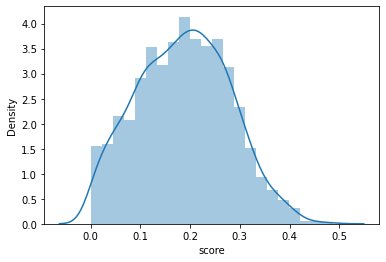

In [54]:
import seaborn as sns
sns_plot = sns.distplot(users_score['score'])
fig = sns_plot.get_figure()

Например у 776 пользователей из 1700 оценка выше чем 0.2, можно их позвать

In [58]:
users_score[users_score['score'] > 0.2].count()

techno/all     776
techno_pos     776
total_hours    776
score          776
dtype: int64